## Polytope Climate-DT MN5 example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from Mare Nostrum 5 from the `clmn` stream which is used for monthly means and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [ ]:
import earthkit.data
import earthkit.plots
import earthkit.regrid

# This request matches multiple parameter of the climate DT

request = {
    "class": "d1",
    "dataset": "climate-dt",
    "generation": "1",
    "expver": "0001",
    "activity": "scenariomip",
    "experiment": "ssp3-7.0",
    "realization": "1",
    "model": "ifs-fesom",
    "resolution": "standard",
    "stream": "clmn",
    "type": "fc",
    "year": "2020",
    "month": "2",
    "levtype": "sfc",
    "param": "228004"
}

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.mn5.apps.dte.destination-earth.eu", stream=False)


In [2]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,avg_2t,heightAboveGround,2,20200215,0,0-360,fc,None,healpix


/etc/ecmwf/nfs/dh1_home_a/maaw/test_polytope/earthkit-plots/src/earthkit/plots/components/subplots.py:727: UserWarning: `plot` is deprecated. Use `quickplot` instead.
  warnings.warn("`plot` is deprecated. Use `quickplot` instead.")


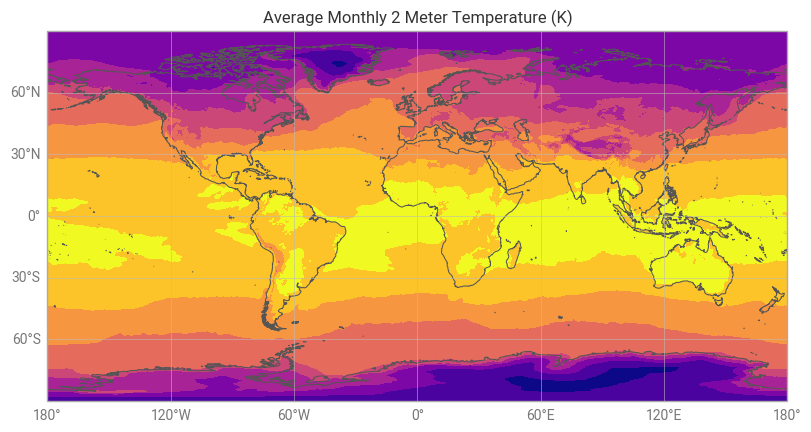

In [4]:
chart = earthkit.plots.Map(extent=[-180, 180, -90, 90])
chart.plot(
    data[0]
)

chart.title("Average Monthly 2 Meter Temperature (K)")
chart.coastlines()
chart.gridlines()
chart.show()

In [5]:
# Regrid t=from healpix for conversion to xarray
data_latlon = earthkit.regrid.interpolate(data, out_grid={"grid": [1,1]}, method="linear")
# Convert data to xarray
data_latlon.to_xarray(engine='cfgrib')

<xarray.Dataset> Size: 265kB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 181,
                        longitude: 360)
Coordinates:
  * time               (time) datetime64[ns] 8B 2020-02-15
  * step               (step) timedelta64[ns] 8B 15 days
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 1kB 90.0 89.0 88.0 ... -89.0 -90.0
  * longitude          (longitude) float64 3kB 0.0 1.0 2.0 ... 357.0 358.0 359.0
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    avg_2t             (time, step, heightAboveGround, latitude, longitude) float32 261kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          1003
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-20T08:02 GRIB to CDM+CF via cfgrib-0.9.1...